## Weather Prediction Project

### Questions

**1) Your views about the problem statement?**

The problem statement presents a real-world scenario that focuses on challenge of predicting rainfall in Sydney using machine learning. In this case, the problem is structured as a classification task where the goal is to predict whether it will rain tomorrow or not based on weather related variables from previous days. By applying various machine learning models like Decision Trees,Bagging,Boosting and RandomForest, the problem encourages the exploration of different algorithmic approaches to optimize prediction accuracy. As an ML expert at Daily Buzz, my task is to create a model that predicts whether it will rain or not. Out of all the models that are available, the model with the best accuracy is to be selected.

**2) What will be your approach to solving this task?**

**i) Data Preprocessing:**

a) Transform raintoday and raintomorrow to dummy variables.

b) extract month from the date.

c) create visualizations and study them.

d) detect and manage outliers that might skew model's performance.

**ii) Model Selection:** 

Test different models like Logistic Regression, KNN, LDA and more complex models like Decision Tree, Bagging, Random Forest, Gradient Boosting, AdaBoost and XGBoost.

**iii) Model Training and Evaluation:**

a) Split the dataset into training and test sets. Use training dataset to train each model and evaluate how well it performs using test data set.

b) Use accuracy score and confusion matrix to evaluate each model's performance.

c) Select the model with best accuracy.

**iv) Model Tuning:**

a) Fine-tune model parameters; such as max depth, min sameple leaf, n_estimators for Decision Tree, Random Forest and Boosting algorithms using GridSearchCV.


**3) What were the available ML model options you had to perform this task?**

**(a) Logistic Regression:** A simple model that establishes a relationship between the input features and the target variable.

**(b) LDA:** A classification technique that reduces dimensionality by projecting data to maximize class separation.

**(c) K-Nearest Neighbors(KNN):** A simple model that predicts the salary based on the average salary of nearby data points.

**(d) Decision Trees:** A non-linear model that splits the data based on decision rules derived from input features.

**(e) Random Forest:** An ensemble method based on decision trees. It reduces overfitting and improves accuracy by averaging the predictions of multiple decision trees.

**(f) Boosting:** A technique that combines multiple weak learners, where each new model focuses on correcting errors made by previous models to improve overall performance.

**(g) AdaBoost:** A boosting algorithm that assigns higher weights to incorrectly classified data points and focuses on these points in next iteration to reduce error and increase accuracy.

**(h) XGBoost:** An optimized version of boosting that uses techniques like Ridge/Lasso and efficient computation to improve speed, accuracy, and handling large datasets.

**4) Which model's performance is best and what could be the possible reason for that?**

We tested several model's and their accuracy have been displayed in table. We found that our Bagging Classifier with default estimator had accuracy of 1 which implies that the model is overfitting. So we used **Bagging Classifier having Decision Tree with tuned hyperparameters as our estimator and the model gave best accuracy(0.8338).**

i) The Bagging Classifier with a tuned Decision Tree as the base estimator performs best because it effectively reduces variance and overfitting by averaging predictions across multiple decision trees, resulting in robust and stable performance. 

ii) Tuning the hyperparameters of the Decision Tree further enhances its predictive power, making the model well-suited for complex datasets.

iii) Bagging Classifier's ability to handle high variance datasets makes it ideal when accuracy is the main goal.

**5) What steps can you take to improve this selected model's performance even further?**

To further improve the performance of the model, I can take the following steps:

1) Experiment more with different hyperparameters of DecisionTreeRegressor that has been used in Bagging.

2) Since our computational power is limited because of our pc, we can explore wide range of values in gridsearchcv and find out more optimal values.

3) We can try combining predicitons from different models to improve the overall performance.

4) We can consider using other techniques like K-Fold Cross-Validation and other techniques to ensure model's performance is consistent across different subsets of the data.

5) Perform feature selection to remove irrelevant or redundant features, which can reduce noise and improve both training time and accuracy.

6) Try scaling the features if needed (e.g., using StandardScaler or MinMaxScaler) to ensure the model handles varying feature ranges more effectively.

7) Explore dimensionality reduction techniques like PCA (Principal Component Analysis) to reduce feature space and improve computational efficiency, while potentially boosting model accuracy.

##### Exploratory Data Analysis

Importing Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Loading the dataset
#df = pd.read_excel('E:/Interview Prep Internshala/sydney_rain prediction.xlsx', engine='openpyxl')
#Saving the dataframe to csv
#df.to_csv(''E:/Interview Prep Internshala/sydney_rain prediction.csv', index=False)
#Loading the saved csv file
df = pd.read_csv('E:/Interview Prep Internshala/sydney_rain prediction.csv',header=0)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


Summary Info and Stats

In [4]:
#Taking a look at dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


Date column is object, it should be in datetime format

Looking into the number of missing values per column as percentage:

In [5]:
#Calculate the percentage of missing values for each column
round(df.isna().sum()/len(df),3)

Date            0.000
Location        0.000
MinTemp         0.001
MaxTemp         0.001
Rainfall        0.002
Evaporation     0.015
Sunshine        0.005
Humidity9am     0.004
Humidity3pm     0.004
Pressure9am     0.006
Pressure3pm     0.006
Cloud9am        0.170
Cloud3pm        0.168
Temp9am         0.001
Temp3pm         0.001
RainToday       0.002
RainTomorrow    0.000
dtype: float64

Missing values across multiple columns but evaportion, cloud9am and cloud3pm seem to be missing large number of values

In [6]:
#Calculating the mode
mode_value = df['RainToday'].mode()[0]
mode_value

'No'

In [7]:
#Replacing Missing values of RainToday with mode
df['RainToday'].fillna(mode_value,inplace=True)

C:\Users\Decrypt\AppData\Local\Temp\ipykernel_13600\3960253074.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday'].fillna(mode_value,inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3337 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


Creating Dummy Variables

In [9]:
#Create dummy variables
df = pd.get_dummies(df, columns=['RainToday','RainTomorrow'],dtype=int,drop_first=True)
#Displaying first few rows of 'df'.
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [10]:
#Summary Statistics
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


Rainfall value clearly has some outliers since the max value is 119.4000 despite 75th percentile being 1.40000

In [11]:
#Correlation matrix to check how well features correlate with each other
df['Date'] = pd.to_datetime(df['Date'])
#Checking if Date has been changed to correct format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   Location          3337 non-null   object        
 2   MinTemp           3334 non-null   float64       
 3   MaxTemp           3335 non-null   float64       
 4   Rainfall          3331 non-null   float64       
 5   Evaporation       3286 non-null   float64       
 6   Sunshine          3321 non-null   float64       
 7   Humidity9am       3323 non-null   float64       
 8   Humidity3pm       3324 non-null   float64       
 9   Pressure9am       3317 non-null   float64       
 10  Pressure3pm       3318 non-null   float64       
 11  Cloud9am          2771 non-null   float64       
 12  Cloud3pm          2776 non-null   float64       
 13  Temp9am           3333 non-null   float64       
 14  Temp3pm           3333 n

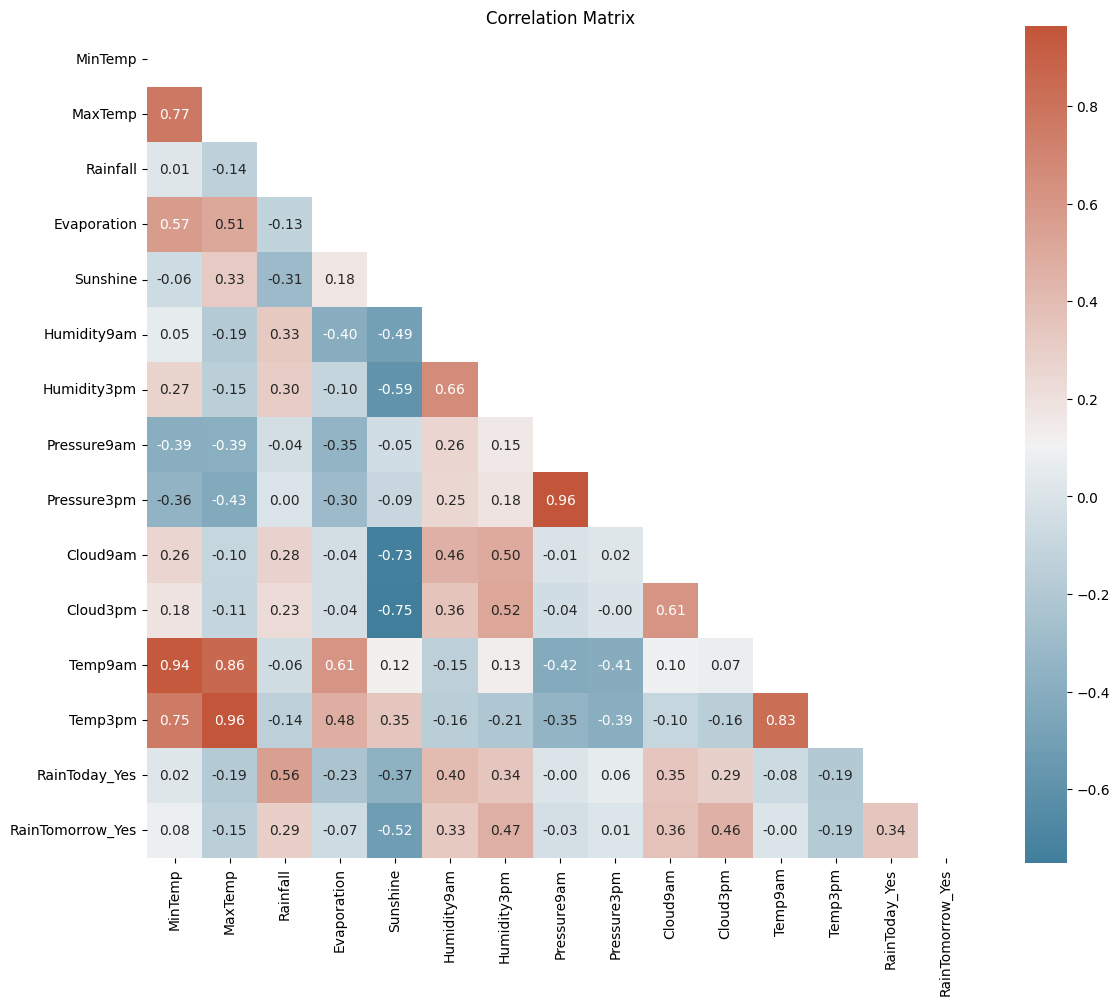

In [12]:
#Correlation Matrix of numerical datatypes for Correlation between features
numeric_df = df.select_dtypes(include=[np.number])
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
plt.title('Correlation Matrix')
#Mask to block the redundant information
mask = np.triu(np.ones_like(numeric_df.corr()))
#Custom Color Map
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(numeric_df.corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()

Features with strong correlations have intuitive reasons for being so and hence there is nothing surprising here.

Most of the values are correlated, so we can use imputer to impute the values

Given strong correlations with certain features, using multivariate feature imputation makes sense.
We are going to use Iterative Imputer which basically it fits a regressor on (x,y) for known y. 
Then the regressor is used to predict the missing values of y.

In [13]:
#Importing necessary module for Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#Selecting only numerical column from dataset
numerical_columns = df.select_dtypes(include='number').columns
#Initialize and apply the imputer
imputer = IterativeImputer(random_state=42)
#Apply the imputer to the numerical columns and update the dataframe
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,Sydney,19.5,22.4,15.6,6.20000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1.0
1,2008-02-02,Sydney,19.5,25.6,6.0,3.40000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1.0
2,2008-02-03,Sydney,21.6,24.5,6.6,2.40000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1.0
3,2008-02-04,Sydney,20.2,22.8,18.8,2.20000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1.0
4,2008-02-05,Sydney,19.7,25.7,77.4,5.82616,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1.0


In [14]:
#Checking if all the null values have been imputed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3337 non-null   datetime64[ns]
 1   Location          3337 non-null   object        
 2   MinTemp           3337 non-null   float64       
 3   MaxTemp           3337 non-null   float64       
 4   Rainfall          3337 non-null   float64       
 5   Evaporation       3337 non-null   float64       
 6   Sunshine          3337 non-null   float64       
 7   Humidity9am       3337 non-null   float64       
 8   Humidity3pm       3337 non-null   float64       
 9   Pressure9am       3337 non-null   float64       
 10  Pressure3pm       3337 non-null   float64       
 11  Cloud9am          3337 non-null   float64       
 12  Cloud3pm          3337 non-null   float64       
 13  Temp9am           3337 non-null   float64       
 14  Temp3pm           3337 n

Histograms

Text(0.5, 1.01, 'Histograms of Columns')

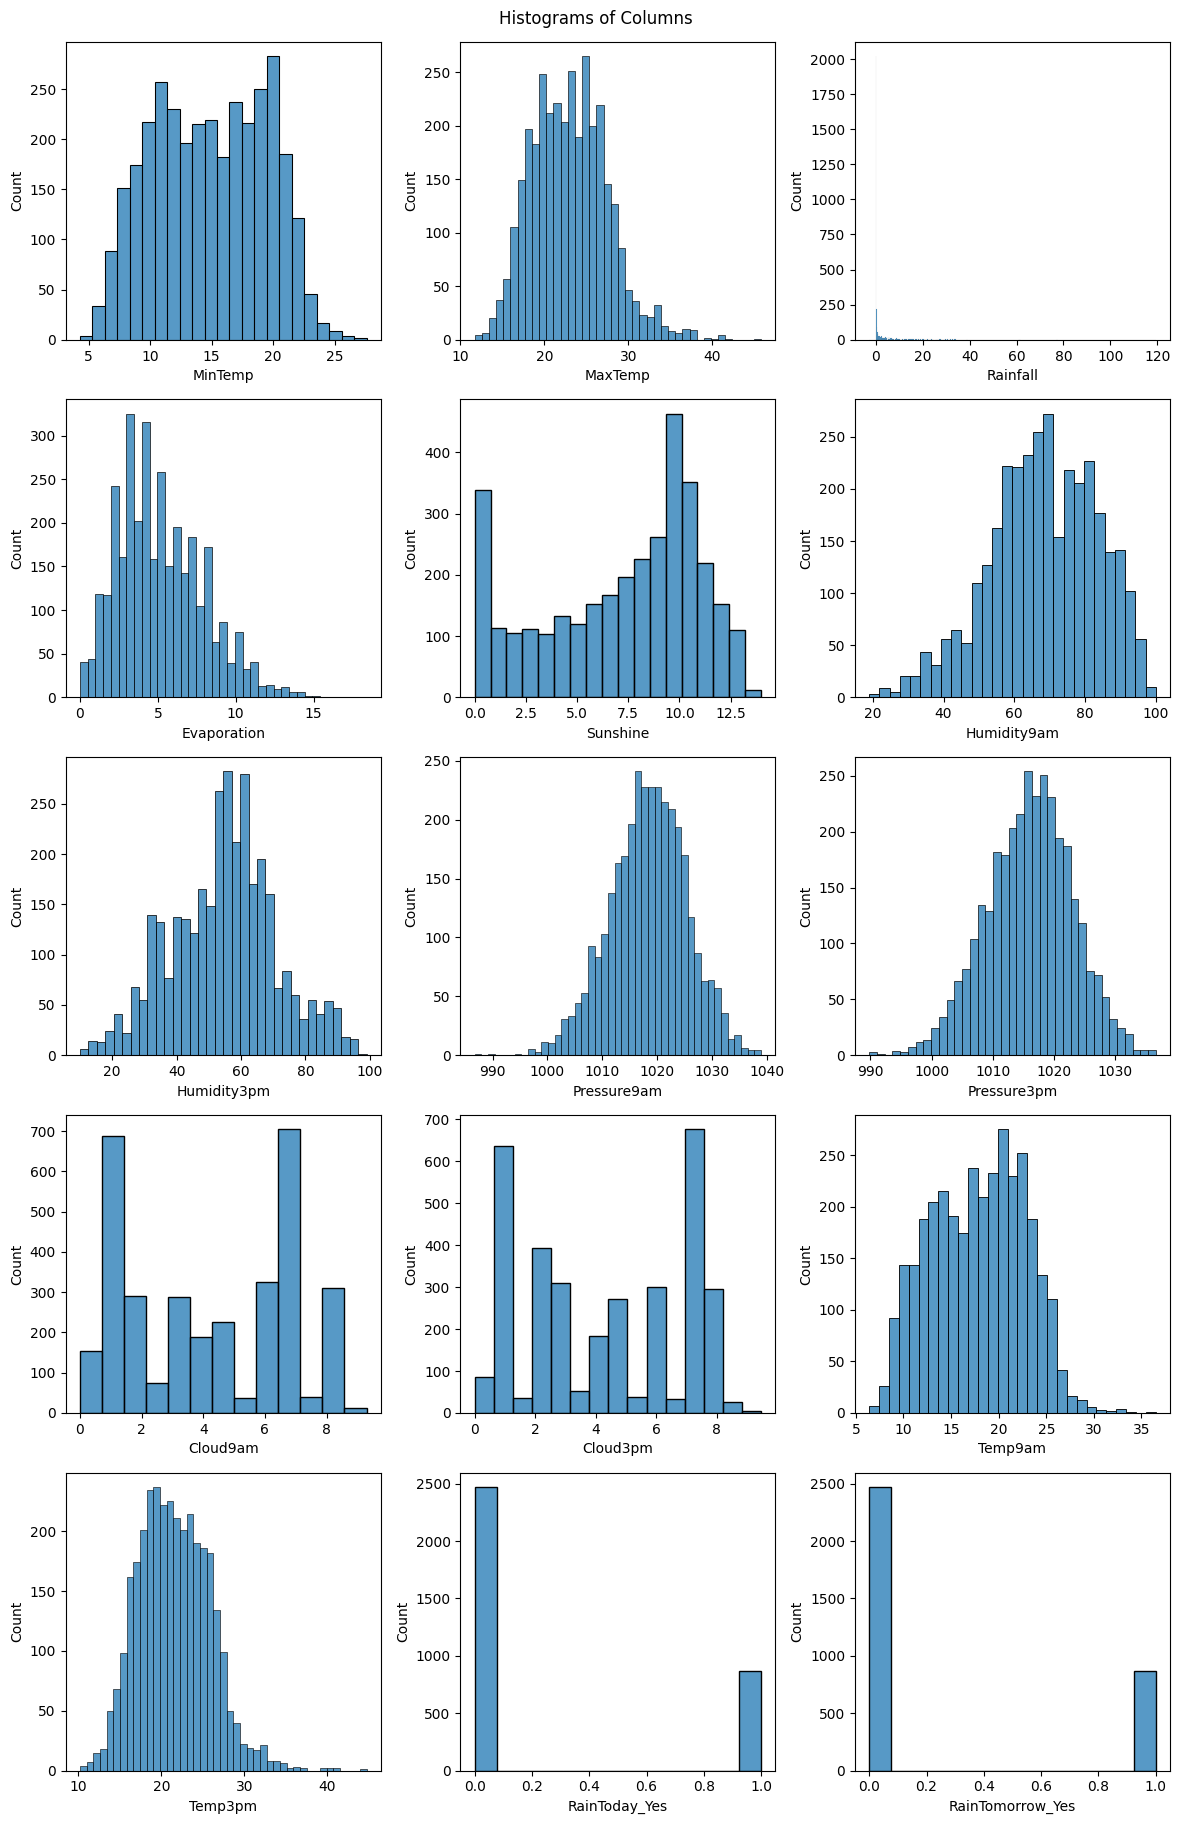

In [15]:
#Create subplots with 5 rows and 3 columns
fig, axes = plt.subplots(nrows = 5, ncols =3, figsize=(12,18))
#Reshape the axes array into a 1D array for easy iteration
axes = axes.reshape(-1)
#Identify all the continuous (numeric) columns
continuous = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
#Loop through each continuous column and plot a histogram
for i, col in enumerate(continuous):
    sns.histplot(df[col], ax=axes[i])   #Create a histogram for each column
#Adjust layout to ensure plots don't overlap
fig.tight_layout(pad=1.0)
plt.suptitle('Histograms of Columns', y=1.01)

1) Most features are normally distributed as expected.
2) Rainfall needs to be investigated.

BoxPlots

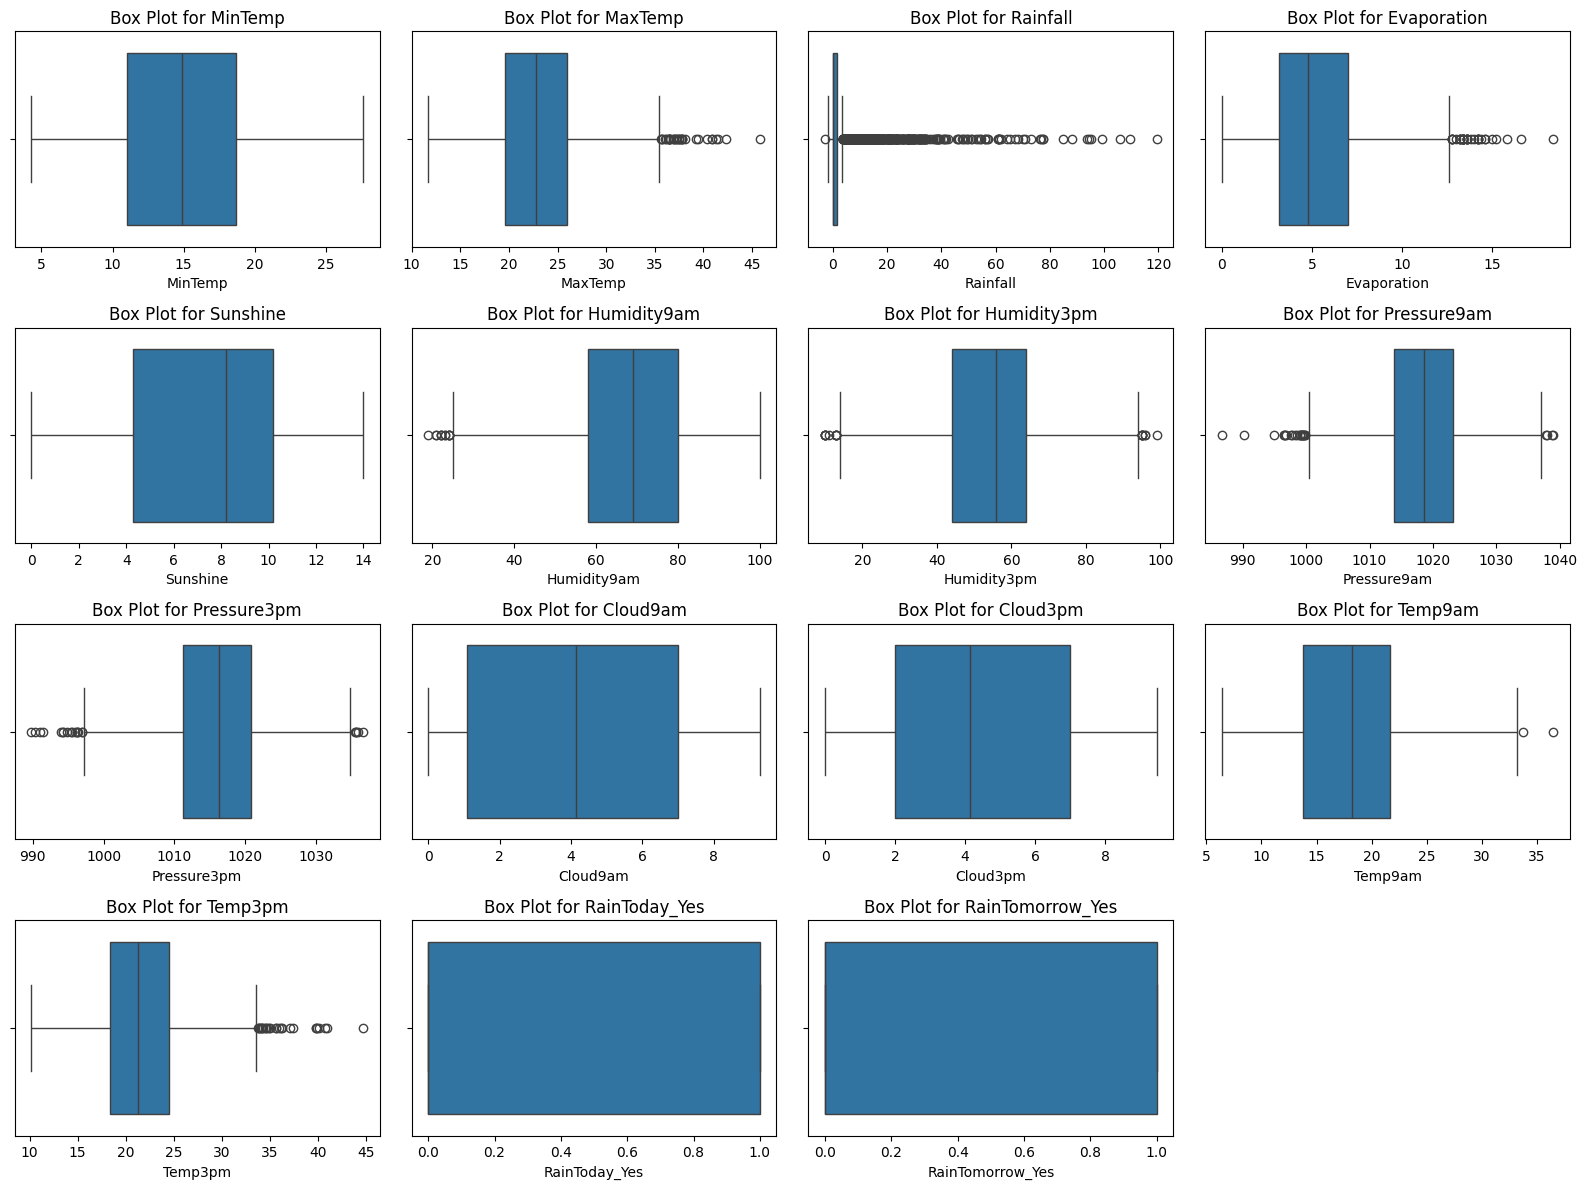

In [16]:
#Set the figure size for the box plots
plt.figure(figsize=(16,12))
#Loop through each column in the numeric DataFrame
for i, col in enumerate(numeric_df,1):
    #Create a subplot for each column (4x4 grid)
    plt.subplot(4,4,i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
#Adjust the layout to prevent overlap   
plt.tight_layout()
plt.show()

**Outlier Treatment**

We can leave the outlier in Rainfall since they are natural phenomenon. We now can work on other outliers.

In [17]:
#Upper limit for max temp
upperlimit_maxTemp = np.percentile(df.MaxTemp, [99])[0]
#Number of values exceeding upper limit
df[(df.MaxTemp > 3*upperlimit_maxTemp)].shape[0]

0

In [18]:
#Upper limit for evaporation
upperlimit_evaporation = np.percentile(df.Evaporation, [99][0])
#Number of values exceeding upper limit
df[(df.Evaporation > 3*upperlimit_evaporation)].shape[0]

0

In [19]:
#Lower limit for evaporation
lowerlimit_humidity9am = np.percentile(df.Humidity9am, [1][0])
#Number of values below lower limit
df[(df.Humidity9am < lowerlimit_humidity9am)].shape[0]

31

In [20]:
#Upper limit for humidity3pm
upperlimit_humidity3pm = np.percentile(df.Humidity3pm, [99][0])
#Number of values exceeding upper limit
df[(df.Humidity3pm > 3*upperlimit_humidity3pm)].shape[0]

0

In [21]:
#Lower limit for humidity3pm
lowerlimit_humidity3pm = np.percentile(df.Humidity3pm, [1][0])
#Number of values below lower limit
df[(df.Humidity3pm < lowerlimit_humidity3pm)].shape[0]

33

In [22]:
#Upper limit for pressure9am
upperlimit_pressure9am = np.percentile(df.Pressure9am, [99][0])
#Number of values exceeding upper limit
df[(df.Pressure9am > 3*upperlimit_pressure9am)].shape[0]

0

In [23]:
#Lower limit for pressure9am
lowerlimit_pressure9am = np.percentile(df.Pressure9am, [1][0])
#Number of values below lower limit
df[(df.Pressure9am < lowerlimit_pressure9am)].shape[0]

34

In [24]:
#Upper limit for pressure3pm
upperlimit_pressure3pm = np.percentile(df.Pressure3pm, [99][0])
#Number of values exceeding upper limit
df[(df.Pressure3pm > 3*upperlimit_pressure3pm)].shape[0]

0

In [25]:
#Lower limit for pressure3pm
lowerlimit_pressure3pm = np.percentile(df.Pressure3pm, [1][0])
#Number of values below lower limit
df[(df.Pressure3pm < lowerlimit_pressure3pm)].shape[0]

34

In [26]:
#Upper value for temp9am
upperlimit_temp9am = np.percentile(df.Temp9am, [99][0])
#Number of values exceeding upper limit
df[(df.Temp9am > 3*upperlimit_temp9am)].shape[0]

0

In [27]:
#Upper limit for temp3pm
upperlimit_temp3pm = np.percentile(df.Temp3pm, [99][0])
#Number of values exceeding upper limit
df[(df.Temp3pm > 3*upperlimit_temp3pm)].shape[0]

0

The values above the upper limit or below lower limit are not significantly higher, indicating they are not extreme outliers. Therefore we can retain these values in dataset without modifying or removing them.

**Seasonality:**

Rainfall exhibits seasonility and through grouping the data by month of the year, the percentage of days that it rains in a given month can be calculated.

In [28]:
#Extracting Month from 'Date' column
df['Month'] = df['Date'].dt.month
#Group by 'month' to find the average RainToday
df_season = df.groupby('Month')['RainToday_Yes'].mean()

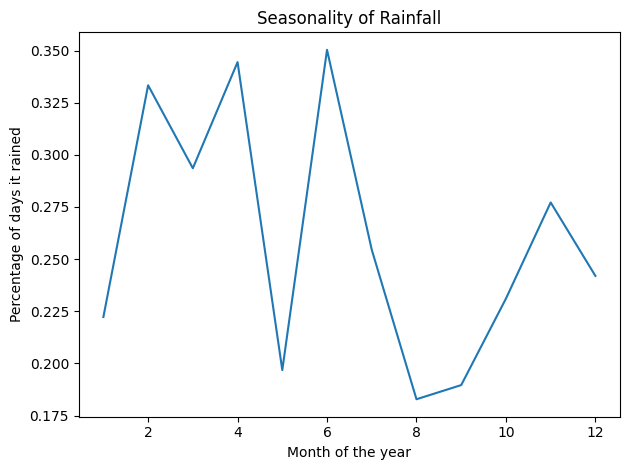

In [29]:
#Plotting Seasonality
sns.lineplot(x=df_season.index, y=df_season)
plt.title('Seasonality of Rainfall')
plt.xlabel('Month of the year')
plt.ylabel('Percentage of days it rained')
plt.tight_layout()

In [30]:
#Drop the date column, since we will be using months because of seasonality
df=df.drop(columns=['Date'])
#Get the list of all column names in the DataFrame
cols = df.columns.tolist()
#Create a new column list with 'Month' as the first column
new_cols = ['Month'] + [col for col in cols if col!='Month']
df=df[new_cols]
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2,Sydney,19.5,22.4,15.6,6.20000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1.0
1,2,Sydney,19.5,25.6,6.0,3.40000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1.0
2,2,Sydney,21.6,24.5,6.6,2.40000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1.0
3,2,Sydney,20.2,22.8,18.8,2.20000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1.0
4,2,Sydney,19.7,25.7,77.4,5.82616,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1.0


In [91]:
#Changing month into float to prevent datatype mismatch during hyperparameter tuning
df['Month'] = df['Month'].astype(float)
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2.0,Sydney,19.5,22.4,15.6,6.20000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1.0
1,2.0,Sydney,19.5,25.6,6.0,3.40000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1.0
2,2.0,Sydney,21.6,24.5,6.6,2.40000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1.0
3,2.0,Sydney,20.2,22.8,18.8,2.20000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1.0
4,2.0,Sydney,19.7,25.7,77.4,5.82616,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1.0


#### Train-Test Split

In [92]:
from sklearn.model_selection import train_test_split
#Dropping target label and location feature
x = df.drop(['RainTomorrow_Yes','Location'],axis=1)
#Defining target variable
y = df['RainTomorrow_Yes']
#Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
x.shape, x_train.shape, x_test.shape

((3337, 15), (2669, 15), (668, 15))

In [94]:
x_train.head()

,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
2208,5.0,14.4,25.5,0.0,3.2,4.7,69.0,41.0,1022.9,1019.6,7.000000,7.000000,16.2,25.2,0.0
3300,5.0,16.7,23.2,14.6,1.0,5.4,86.0,58.0,1017.9,1015.4,8.000000,3.000000,17.5,22.8,1.0
1309,10.0,10.0,20.1,0.2,4.0,2.9,76.0,47.0,1022.6,1018.2,6.066727,6.393290,13.5,17.8,0.0
1472,3.0,20.1,28.0,0.0,7.8,10.3,81.0,69.0,1012.8,1009.4,3.392543,3.505433,22.6,25.5,0.0
582,9.0,14.7,21.2,0.0,6.4,10.2,36.0,35.0,1016.1,1015.1,2.000000,1.000000,18.2,19.8,0.0


#### Training on different models

Creating Evaluation Function

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix
def evaluate_model(model, x_train, y_train, x_test, y_test, model_name):
    """
    Evaluates a Machine Learning Model on training and testing data.
    Args:
        model: The trained model.
        x_train: Training Features.
        y_train: Training Labels.
        x_test: Testing Features.
        y_test: Testing Labels.
        model_name: Name of model for displaying purpose.
    Returns:
        A tuple containing the training accuracy, testing accuracy and confusion metrics for both
        training and testing data.
    """
    #Training Metrics
    y_pred_train = model.predict(x_train)
    #Calculates Training accuracy
    accuracy_train = accuracy_score(y_train,y_pred_train)
    #Generates Confusion Matrix
    confusion_train = confusion_matrix(y_train,y_pred_train)
    #Testing Metrics
    y_pred_test = model.predict(x_test)
    #Calculates Testing accuracy
    accuracy_test = accuracy_score(y_test,y_pred_test)
    #Generates Confusion Matrix
    confusion_test = confusion_matrix(y_test,y_pred_test)
    # Printing evaluation metrics and confusion matrices
    print(f"Accuracy score of Train Data for {model_name}: {accuracy_train:.4f}")
    print(f"Accuracy score of Test Data for {model_name}: {accuracy_test:.4f}")
    #Plot confusion matrix for training data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_train, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix of Train data for {model_name}')
    #Plot confusion matrix for testing data
    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix of Test data for {model_name}')
    plt.tight_layout()
    plt.show()
    return accuracy_train, accuracy_test, confusion_train, confusion_test

1) Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#Calculates Logistic Regression model with solver liblinear
clf_log = LogisticRegression(solver='liblinear')
#Defining paramter values 
param_log = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [500, 1000, 1500],
}
#Create a Grid Search object
grid_log = GridSearchCV(estimator=clf_log,param_grid=param_log,cv=5,scoring='accuracy',n_jobs=-1)
#Fit the grid search on training data
grid_log.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [500, 1000, 1500],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [51]:
#Access the best hyperparameters
grid_log.best_params_

{'C': 10, 'max_iter': 1000, 'penalty': 'l1'}

In [52]:
#Best Logistic Regression model found during grid search
clf_bestlog = grid_log.best_estimator_

Accuracy score of Train Data for LogisticRegression: 0.8400
Accuracy score of Test Data for LogisticRegression: 0.8263


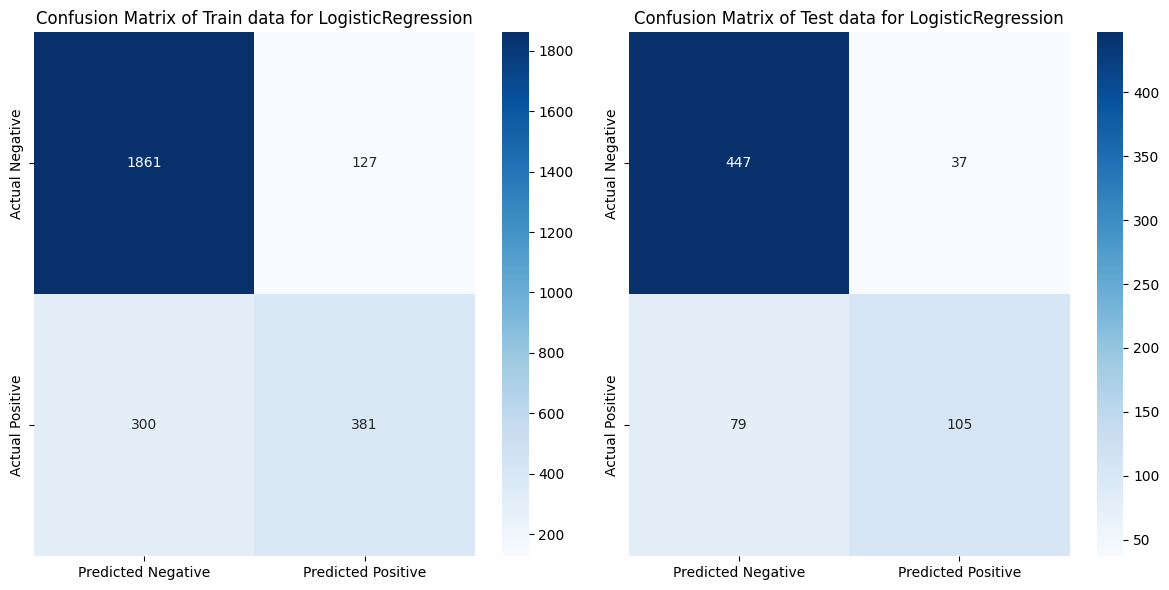

In [117]:
#Call created function to return accuracies and generate confusion matrix
acc_log_train, acc_log_test, conf_log_train, conf_log_test = evaluate_model(
    clf_bestlog, x_train, y_train, x_test, y_test, "LogisticRegression")

2) LDA

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Create an LDA model
clf_lda = LinearDiscriminantAnalysis()
#Fit the model on training data
clf_lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

Accuracy score of Train Data for LDA: 0.8329
Accuracy score of Test Data for LDA: 0.8219


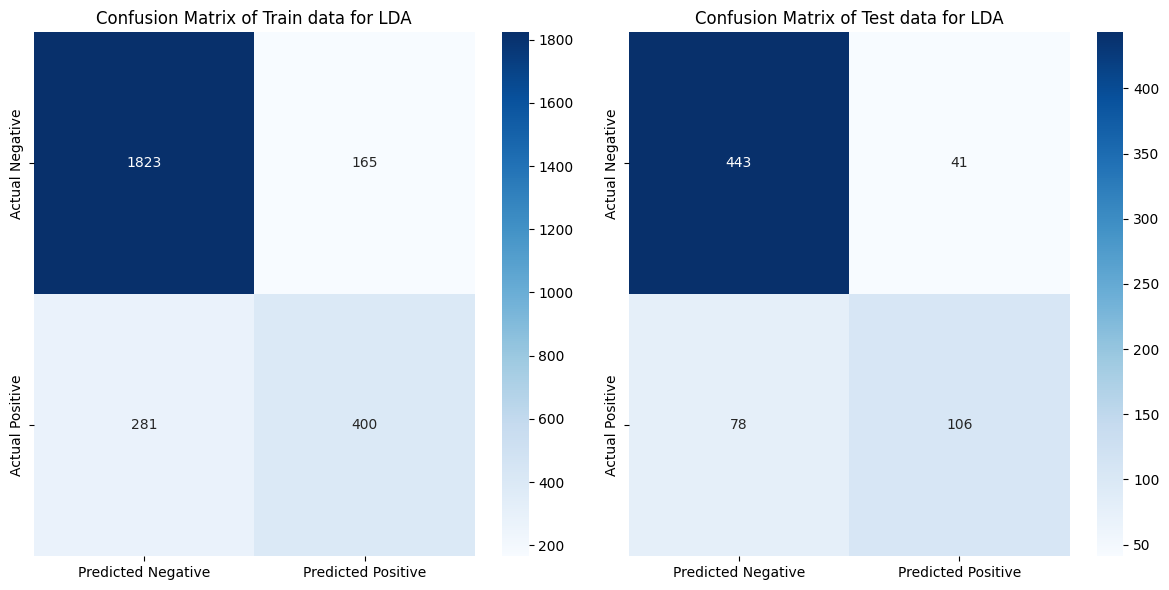

In [118]:
#Call created function to return accuracies and generate confusion matrix
acc_lda_train, acc_lda_test, conf_lda_train, conf_lda_test = evaluate_model(
    clf_lda, x_train, y_train, x_test, y_test, "LDA")

Adjusting threshold to 0.6

Accuracy Score of Train Data for LDA with adjusted threshold: 0.8400149868864744


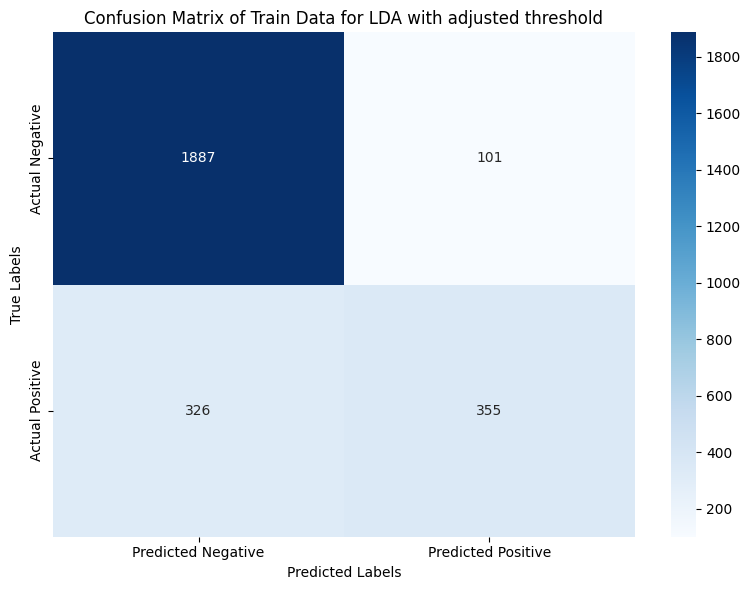

In [107]:
#Training Metrics
y_lda6_train = (clf_lda.predict_proba(x_train)[:,1]>0.6)
acc_lda6_train = accuracy_score(y_train,y_lda6_train)
conf_lda6_train = confusion_matrix(y_train, y_lda6_train)
#Printing Evaluation Metrics
print(f"Accuracy Score of Train Data for LDA with adjusted threshold: {acc_lda6_train}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_lda6_train, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Train Data for LDA with adjusted threshold')
plt.tight_layout()

Accuracy score for LDA: 0.8293413173652695


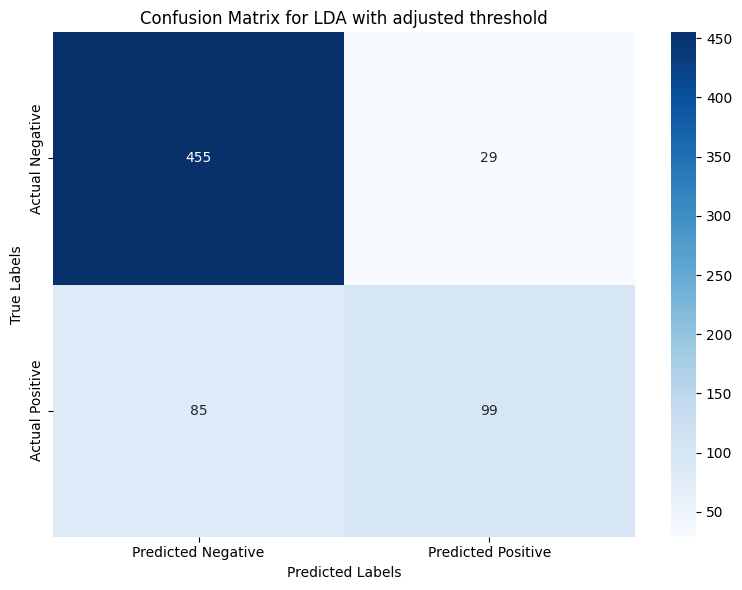

In [74]:
#Testing Metrics
y_lda_06 = (clf_lda.predict_proba(x_test)[:,1]>0.6)
acc_lda_06 = accuracy_score(y_test,y_lda_06)
conf_lda_06 = confusion_matrix(y_test, y_lda_06)
#Printing Evaluation Metrics
print(f"Accuracy score for LDA: {acc_lda_06}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_lda_06, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LDA with adjusted threshold')
plt.tight_layout()

3) KNN

Standardizing the data

In [77]:
from sklearn.preprocessing import StandardScaler
#Standardizing train data
scaler_train = StandardScaler().fit(x_train)
x_train_s = scaler_train.transform(x_train)
#Standardizing test data
scaler_test = StandardScaler().fit(x_test)
x_test_s = scaler_test.transform(x_test)

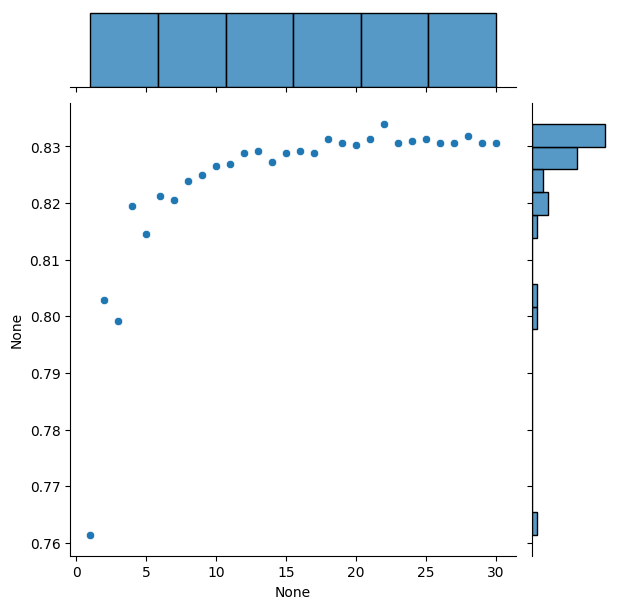

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
#Create a KNN Classifier
clf_knn = KNeighborsClassifier()
#Defining paramter range for n_neighbors
param_knn = np.arange(1,31)
#Validation curve for KNN 
train_scores, test_scores = validation_curve(clf_knn,x_train_s,y_train,param_name='n_neighbors',param_range=param_knn,cv=5,scoring='accuracy',n_jobs=-1)
#Calculating Average Test score for different values of n_neighbors
test_mean_knn = np.mean(test_scores,axis=1)
#Visualize relationship between n_neighbors and average test score
sns.jointplot(x=param_knn,y=test_mean_knn)

In [79]:
#Find the index of n_neighbors with maximum value of average test score
np.where(test_mean_knn==max(test_mean_knn))

(array([21], dtype=int64),)

In [80]:
#Create KNN with best value of n_neighbors
clf_knn_best = KNeighborsClassifier(n_neighbors=param_knn[21])
#Train the model on standardized training data
clf_knn_best.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=22)

Accuracy score of Train Data for KNN: 0.8449
Accuracy score of Test Data for KNN: 0.8249


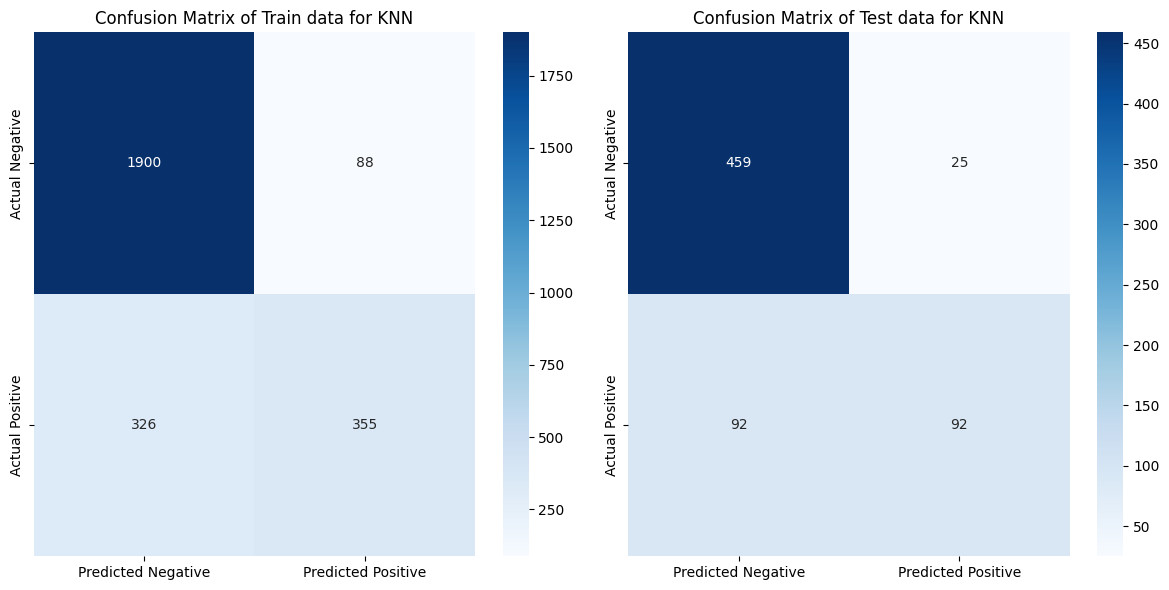

In [120]:
#Call created function to return accuracies and generate confusion matrix
acc_knn_train, acc_knn_test, conf_knn_train, conf_knn_test = evaluate_model(
    clf_knn_best, x_train_s, y_train, x_test_s, y_test, "KNN")

4) Decision Tree

In [95]:
from sklearn import tree
#Create a Decision Tree Model
clf_decision = tree.DecisionTreeClassifier()
#Defining paramter values 
param_decision = {
    'max_depth': range(1,11),
    'min_samples_split': range(2,11),
    'min_samples_leaf': range(1,11)
}
#Create a Grid Search object
grid_decision = GridSearchCV(estimator=clf_decision,param_grid=param_decision,scoring='accuracy',cv=5,n_jobs=-1)
#Fit the grid search on training data
grid_decision.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)},
             scoring='accuracy')

In [85]:
#Access the best hyperparameters
grid_decision.best_params_

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 3}

In [96]:
#Best Decision Tree model found during grid search
clf_decision_best = grid_decision.best_estimator_

Accuracy score of Train Data for DecisionTree: 0.8445
Accuracy score of Test Data for DecisionTree: 0.8114


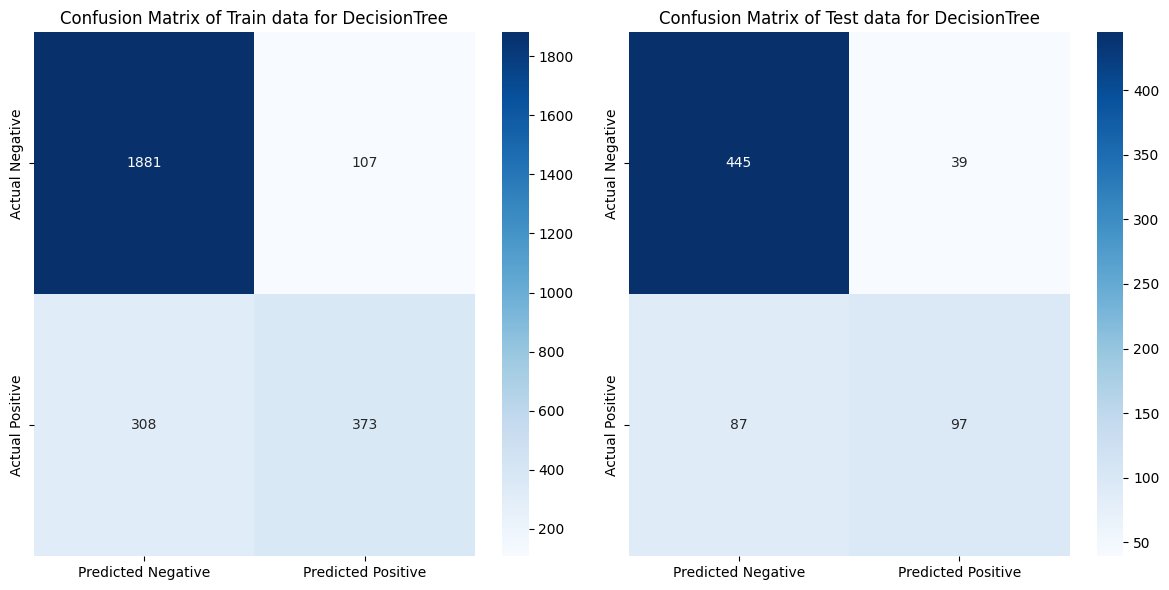

In [121]:
#Call created function to return accuracies and generate confusion matrix
acc_decision_train, acc_decision_test, conf_decision_train, conf_decision_test = evaluate_model(
    clf_decision_best, x_train, y_train, x_test, y_test, "DecisionTree")

5) Bagging

i) By default it uses Decision Tree

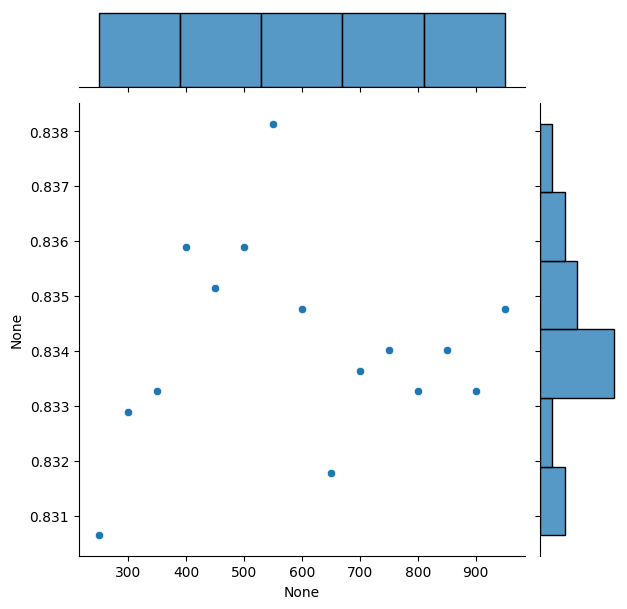

In [99]:
from sklearn.ensemble import BaggingClassifier
#Create a Bagging Classifier 
clf_bag = BaggingClassifier()
#Defining paramter range for 'n_estimators'
param_bag = np.arange(250,1000,50)
#Validation curve for Bagging
train_scores_bag, test_scores_bag = validation_curve(clf_bag, x_train, y_train, param_range = param_bag, param_name = 'n_estimators', cv=5, scoring = 'accuracy', n_jobs=-1)
#Calculating Average Test score for different values of 'n_estimators'
test_mean_bag = np.mean(test_scores_bag,axis=1)
#Visualize relationship between 'n_estimators' and average test score
sns.jointplot(x=param_bag,y=test_mean_bag)

In [122]:
#Find the index of 'n_estimators' with maximum value of average test score
np.where(test_mean_bag==max(test_mean_bag))

(array([6], dtype=int64),)

In [125]:
#Create Bagging Classifier with best 'n_estimator'
clf_bag_best = BaggingClassifier(n_estimators=param_bag[6],random_state=42)
#Train the model on training data
clf_bag_best.fit(x_train,y_train)

BaggingClassifier(n_estimators=550, random_state=42)

Accuracy score of Train Data for BaggingClassifier: 1.0000
Accuracy score of Test Data for BaggingClassifier: 0.8249


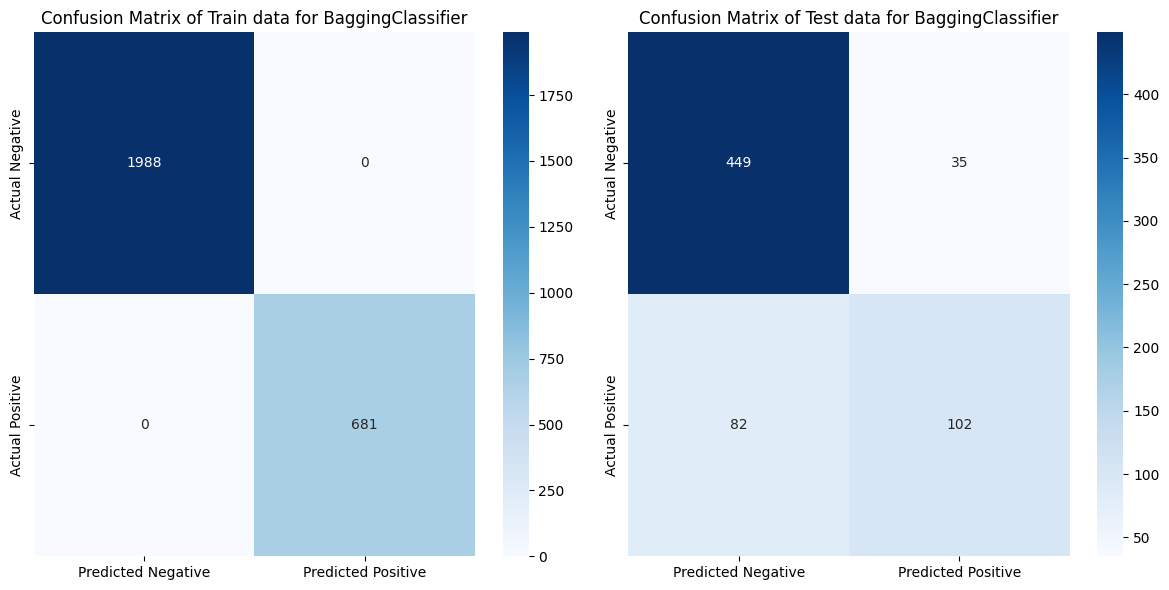

In [126]:
#Calculate evaluation metrics using created functions
acc_bag_train, acc_bag_test, conf_bag_train, conf_bag_test = evaluate_model(
    clf_bag_best, x_train, y_train, x_test, y_test, "BaggingClassifier")

Train data has accuracy of 1, which is not possible. This clearly indicates that the model is overfitting

ii) Bagging Classifier using Best Decision Tree as estimator

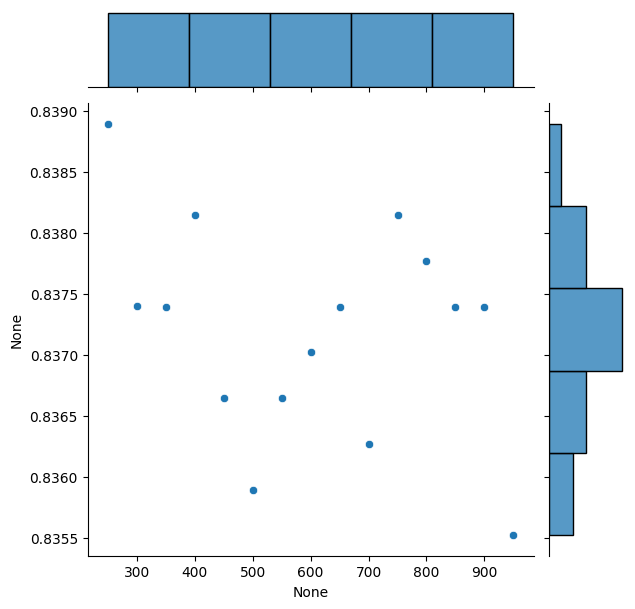

In [127]:
#Create a Bagging Classifier with Decision Tree model as estimator
clf_bag_tree = BaggingClassifier(estimator=clf_decision_best)
#Validation curve for Bagging
train_scores_bag_tree, test_scores_bag_tree = validation_curve(clf_bag_tree, x_train, y_train, param_range = param_bag, param_name = 'n_estimators', cv=5, 
                                                               scoring = 'accuracy', n_jobs=-1)
#Calculating Average Test score for different values of 'n_estimators'
test_mean_bag_tree = np.mean(test_scores_bag_tree,axis=1)
#Visualize relationship between 'n_estimators' and average test score
sns.jointplot(x=param_bag,y=test_mean_bag_tree)

In [128]:
#Find the index of 'n_estimators' with maximum value of average test score
np.where(test_mean_bag_tree==max(test_mean_bag_tree))

(array([0], dtype=int64),)

In [129]:
#Create Bagging Classifier with best 'n_estimator'
clf_bag_tree_best = BaggingClassifier(estimator=clf_decision_best,n_estimators=param_bag[0],random_state=42)
#Fit the model on training data
clf_bag_tree_best.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                   min_samples_leaf=4,
                                                   min_samples_split=5),
                  n_estimators=250, random_state=42)

Accuracy score of Train Data for BaggingClassifier(decision tree): 0.8509
Accuracy score of Test Data for BaggingClassifier(decision tree): 0.8338


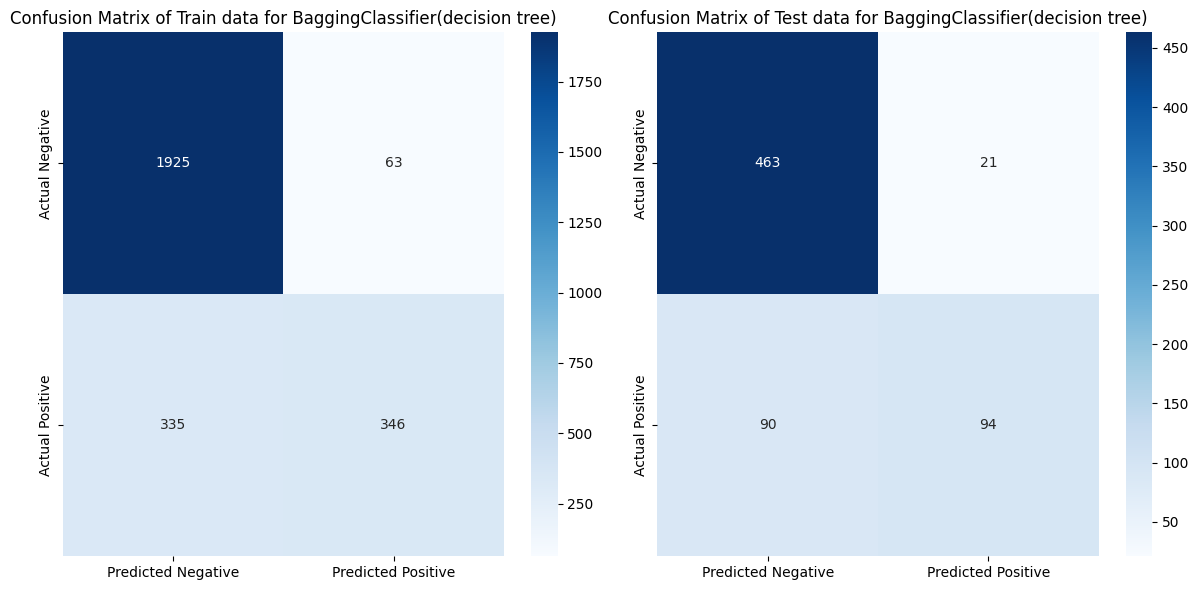

In [130]:
#Calculate evaluation metrics using the created function
acc_bag_tree_train, acc_bag_tree_test, conf_bag_tree_train, conf_bag_Tree_test = evaluate_model(
    clf_bag_tree_best, x_train, y_train, x_test, y_test, "BaggingClassifier(decision tree)")

By using decision tree as estimator we were able to tackle overfitting.

6) Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
#Taking limited values since we don't have enough computational power and gridsearch takes time
param_rf = {
    'n_estimators': [100,150,200],
    'max_depth': [10,15],
    'min_samples_split': [2,5,7],
    'min_samples_leaf': [1,3,5]
}
#Grid Search to perform hyperparamter tuning
grid_rf = GridSearchCV(clf_rf,param_rf,scoring='accuracy',cv=5,n_jobs=-1)
#Train the model on training data
grid_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [140]:
#Access the best hyperparameters
grid_rf.best_params_

{'max_depth': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [141]:
#Best Random Forest found during grid search
clf_rf_best = grid_rf.best_estimator_

Accuracy score of Train Data for RandomForest: 0.9434
Accuracy score of Test Data for RandomForest: 0.8219


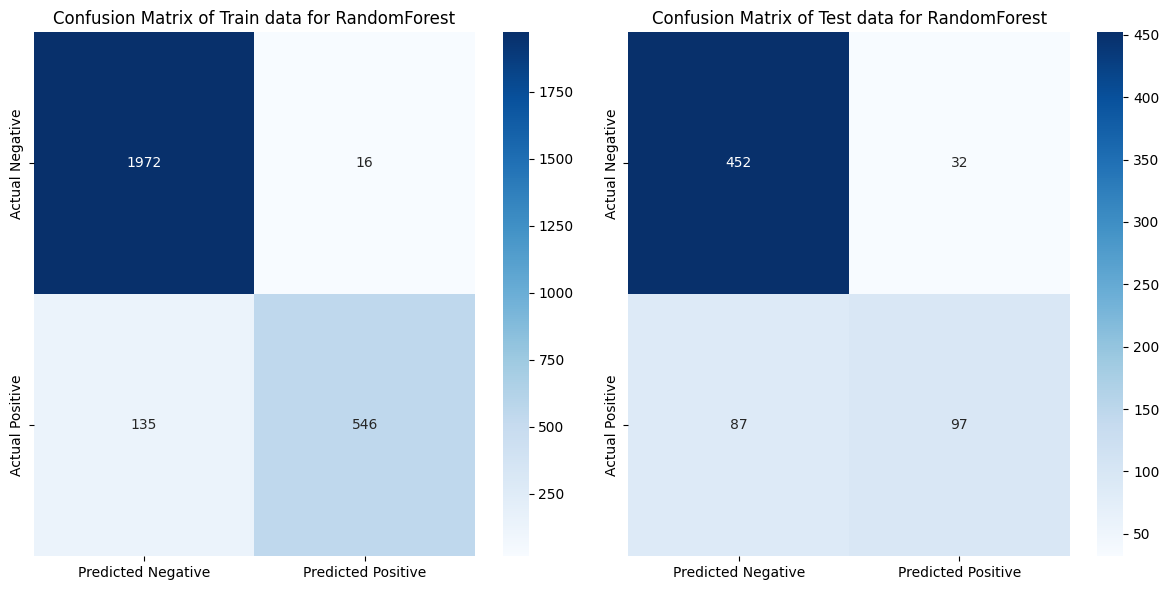

In [142]:
#Evaluate the model using the function
acc_rf_train, acc_rf_test, conf_rf_train, conf_rf_test = evaluate_model(
    clf_rf_best, x_train, y_train, x_test, y_test, "RandomForest")

7) Gradient Boosting

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
#Initialize Gradient Boosting
clf_gb = GradientBoostingClassifier()
#Define paramter grid for Gradient Boosting
param_gb = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.07, 0.1, 0.2],
    'max_depth': [3,5,6],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [2,3,5]
}
#Setup GridSearch for hyperparameter tuning
grid_gb = GridSearchCV(clf_gb,param_gb,scoring='accuracy',n_jobs=-1,cv=5)
#Train the model on training data
grid_gb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.1, 0.2],
                         'max_depth': [3, 5, 6], 'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [145]:
#Access the best hyperparameters
grid_gb.best_params_

{'learning_rate': 0.07,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 50}

In [146]:
#Best Gradient Boosting Regressor found during grid search
clf_gb_best = grid_gb.best_estimator_

Accuracy score of Train Data for GradientBoosting: 0.8599
Accuracy score of Test Data for GradientBoosting: 0.8323


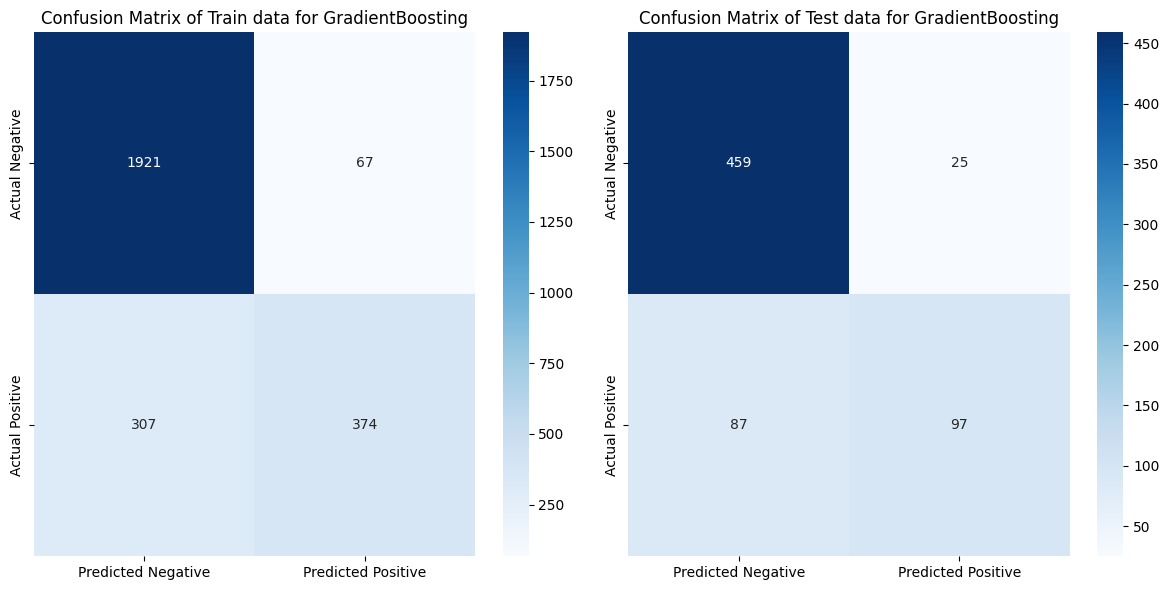

In [147]:
#Evaluate the model using the function
acc_gb_train, acc_gb_test, conf_gb_train, conf_gb_test = evaluate_model(
    clf_gb_best, x_train, y_train, x_test, y_test, "GradientBoosting")

8) AdaBoost

i) Using deafult estimator

In [154]:
#Creating AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
#Define paramter grid for AdaBoost
clf_ab = AdaBoostClassifier()
#Define paramter grid for AdaBoost
param_ab = {
    'n_estimators': [50,100,150,200],
    'learning_rate': [0.07, 0.1, 0.3]
}
#Setup GridSearch for hyperparameter tuning
grid_ab = GridSearchCV(clf_ab, param_ab, scoring='accuracy', cv=5, n_jobs=-1)
#Train the model on training data
grid_ab.fit(x_train, y_train)

c:\Users\Decrypt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.1, 0.3],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [155]:
#Access the best hyperparameters
grid_ab.best_params_

{'learning_rate': 0.3, 'n_estimators': 100}

In [156]:
#Best AdaBoost found during grid search
clf_ab_best = grid_ab.best_estimator_

Accuracy score of Train Data for ADABoosting: 0.8498
Accuracy score of Test Data for ADABoosting: 0.8249


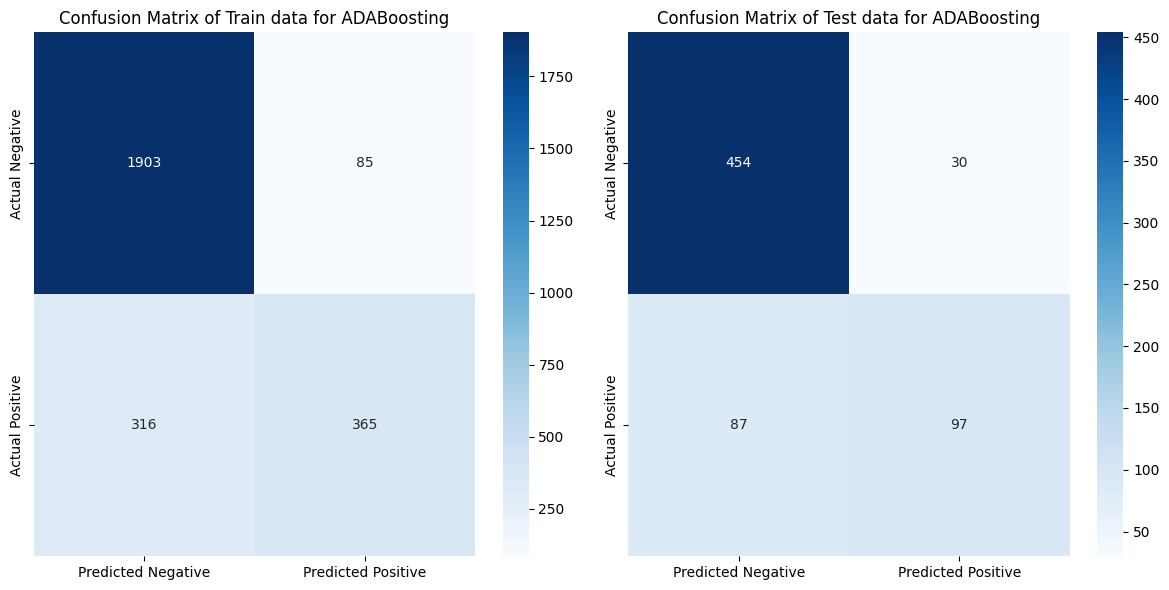

In [157]:
#Evaluate the model using the function
acc_ab_train, acc_ab_test, conf_ab_train, conf_ab_test = evaluate_model(
    clf_ab_best, x_train, y_train, x_test, y_test, "ADABoosting")

ii) Using best decision tree as estimator

In [158]:
#Creating AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
#Define paramter grid for AdaBoost with best decision tree as estimator
clf_ab_tree = AdaBoostClassifier(estimator=clf_decision_best)
#Setup GridSearch for hyperparameter tuning
grid_ab_tree = GridSearchCV(clf_ab_tree, param_ab, scoring='accuracy', cv=5, n_jobs=-1)
#Train the model on training data
grid_ab_tree.fit(x_train, y_train)

c:\Users\Decrypt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                                           min_samples_leaf=4,
                                                                           min_samples_split=5)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.07, 0.1, 0.3],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [159]:
#Access the best hyperparameters
grid_ab_tree.best_params_

{'learning_rate': 0.07, 'n_estimators': 50}

In [160]:
#Best AdaBoost found during grid search
clf_ab_tree_best = grid_ab_tree.best_estimator_

Accuracy score of Train Data for ADABoosting(decision tree): 0.8936
Accuracy score of Test Data for ADABoosting(decision tree): 0.8189


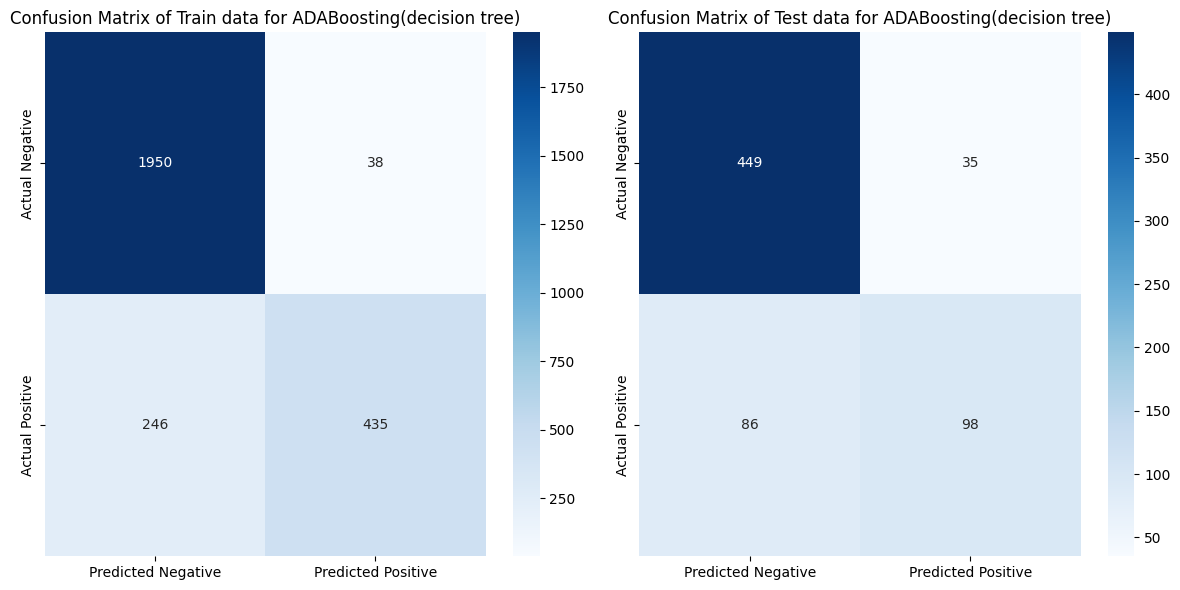

In [161]:
#Evaluate the model using the function
acc_ab_tree_train, acc_ab_tree_test, conf_ab_tree_train, conf_ab_tree_test = evaluate_model(
    clf_ab_tree_best, x_train, y_train, x_test, y_test, "ADABoosting(decision tree)")

9) XGBoost

In [164]:
import xgboost as xgb
#Initialize the XGBoost
clf_xgb = xgb.XGBClassifier()
#Define the parameter grid for the XGBoost
param_xgb = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [3,4,5],
    'min_child_weight': [1,2,3],
    'reg_alpha': [5,7,10],
    'reg_lambda': [6,7,10]
}
#Setup GridSearch for hyperparameter tuning
grid_xgb = GridSearchCV(clf_xgb, param_xgb, scoring='accuracy', cv=5, n_jobs=-1)
#Train the model on training data
grid_xgb.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [50, 100, 150],
                         'reg_alpha': [5, 7, 10], 'reg_lambda': [6, 7, 10]},
             scoring='accuracy')

In [165]:
#Access the best hyperparameters
grid_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 100,
 'reg_alpha': 7,
 'reg_lambda': 6}

In [166]:
#Best XGBoost found during grid search
clf_xgb_best = grid_xgb.best_estimator_

Accuracy score of Train Data for XGBooost: 0.8715
Accuracy score of Test Data for XGBooost: 0.8174


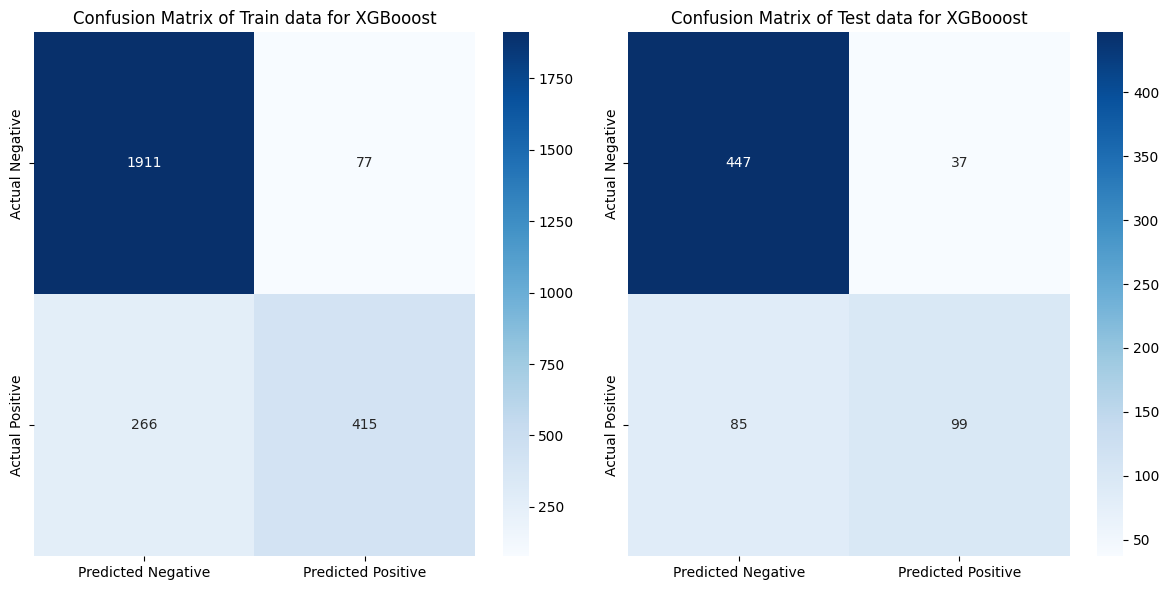

In [167]:
#Evaluate the model using the function
acc_xgb_train, acc_xgb_test, conf_xgb_train, conf_xgb_test = evaluate_model(
    clf_xgb_best, x_train, y_train, x_test, y_test, "XGBooost")

Comparison of Different Models

In [172]:
from prettytable import PrettyTable
from colorama import Fore, Style
#Create a PrettyTable object
table = PrettyTable()
#Define table headings
table.field_names = ["Model Name", "Accuracy(Train)", "Accuracy(Test)"]
#Data
data = [
    ["Logistic Regression", acc_log_train, acc_log_test],
    ["LDA", acc_lda_train, acc_lda_test],
    ["LDA(threshold=0.6)", acc_lda6_train, acc_lda_06],
    ["KNN", acc_knn_train, acc_knn_test],
    ["Decision Tree", acc_decision_train, acc_decision_test],
    ["Bagging", acc_bag_train, acc_bag_test],
    ["Bagging(Best DecisionTree)", acc_bag_tree_train, acc_bag_tree_test],
    ["Random Forest", acc_rf_train, acc_rf_test],
    ["Gradient Boosting", acc_gb_train, acc_gb_test],
    ["AdaBoost", acc_ab_train, acc_ab_test],
    ["AdaBoost(Best DecisionTree)", acc_ab_tree_train, acc_ab_tree_test],
    ["XGBoost", acc_xgb_train, acc_xgb_test],
]
#Determine maximum training and testing accuracies
train_max = max(row[1] for row in data)
test_max = max(row[2] for row in data)
#Add rows to the table with highlighting and formatting
for row in data:
    model = row[0]
    train_acc = row[1]  #Access training accuracy from the current row
    test_acc = row[2]  #Access testing accuracy from the current row
    if train_acc == train_max:
        train_acc = Fore.GREEN + f"{train_acc:.4f}" + Style.RESET_ALL  #Highlight and format training accuracy
    else:
        train_acc = f"{train_acc:.4f}"  #Format training accuracy
    if test_acc == test_max:
        test_acc = Fore.RED + f"{test_acc:.4f}" + Style.RESET_ALL  #Highlight and format testing accuracy
    else:
        test_acc = f"{test_acc:.4f}"  #Format testing accuracy

    table.add_row([model, train_acc, test_acc])
#Print the table
print(table)

+-----------------------------+-----------------+----------------+
|          Model Name         | Accuracy(Train) | Accuracy(Test) |
+-----------------------------+-----------------+----------------+
|     Logistic Regression     |      0.8400     |     0.8263     |
|             LDA             |      0.8329     |     0.8219     |
|      LDA(threshold=0.6)     |      0.8400     |     0.8293     |
|             KNN             |      0.8449     |     0.8249     |
|        Decision Tree        |      0.8445     |     0.8114     |
|           Bagging           |      1.0000     |     0.8249     |
|  Bagging(Best DecisionTree) |      0.8509     |     0.8338     |
|        Random Forest        |      0.9434     |     0.8219     |
|      Gradient Boosting      |      0.8599     |     0.8323     |
|           AdaBoost          |      0.8498     |     0.8249     |
| AdaBoost(Best DecisionTree) |      0.8936     |     0.8189     |
|           XGBoost           |      0.8715     |     0.8174  

Bar Plot for comparison of accuracies

In [191]:
model_names = ["Logistic\nRegression", "LDA", "LDA\n(threshold=0.6)", "KNN", "Decision\nTree", "Bagging",
               "Bagging\n(Best\nDecisionTree)", "Random\nForest", "Gradient\nBoosting", "AdaBoost",
               "AdaBoost\n(Best\nDecisionTree)", "XGBoost"]
test_accuracies = [acc_log_test, acc_lda_test, acc_lda_06, acc_knn_test, acc_decision_test, acc_bag_test,
                   acc_bag_tree_test, acc_rf_test, acc_gb_test, acc_ab_test, acc_ab_tree_test, acc_xgb_test]

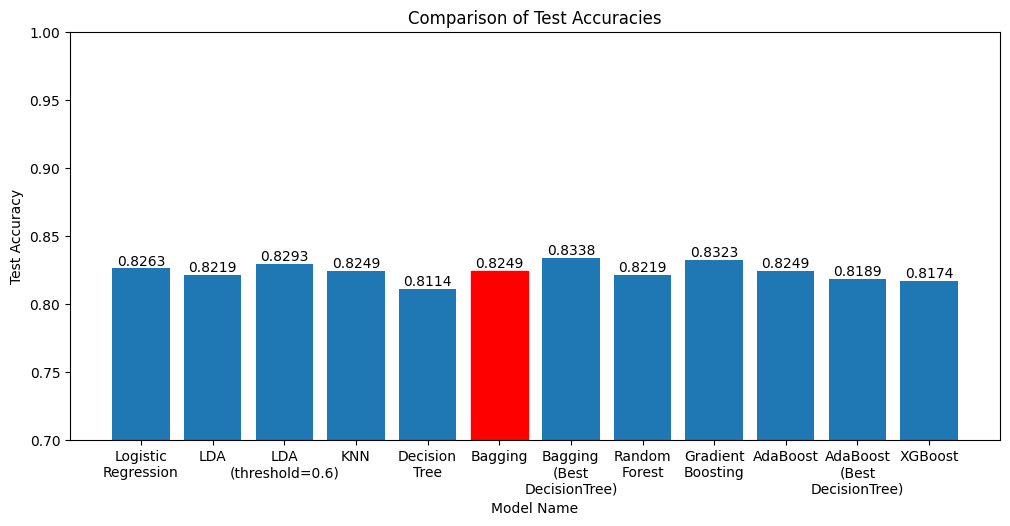

In [200]:
# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, test_accuracies)
# Highlight the Bagging classifier
bagging_index = model_names.index("Bagging")  # Assuming "Bagging" is in the list
bars[bagging_index].set_color('red')  # Change color to red for Bagging model
plt.ylim(0.7, 1.0)
# Add labels and title
plt.xlabel("Model Name")
plt.ylabel("Test Accuracy")
plt.title("Comparison of Test Accuracies")
# Display test accuracy values on top of the bars
for bar, accuracy in zip(bars, test_accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{accuracy:.4f}', ha='center', va='bottom')
# Show the plot
plt.subplots_adjust(bottom=0.2)
plt.show()
